<a href="https://colab.research.google.com/github/RohanCoderiiitb/ECG-Arrhythmia-Detector/blob/main/Neural_Netowork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1 = pd.read_csv("MIT1.csv")
d2 = pd.read_csv("MIT2.csv")
d3 = pd.read_csv("INCART.csv")

In [3]:
d1.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


In [4]:
d2.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,...,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000,184428.000000
mean,851.925299,96.532604,96.514071,0.078229,0.469204,0.533198,-0.801516,-0.211926,8.644897,4.402222,...,-0.144968,8.177625,3.737052,17.415577,5.500900,-0.144968,-0.112553,-0.037224,0.001091,-0.275644
std,27.523259,27.183739,27.238991,0.253668,0.711649,1.015363,0.679356,0.410292,6.560963,3.531380,...,0.256589,5.981321,3.231256,9.346876,4.489371,0.256589,0.267562,0.430383,0.572249,0.578199
min,800.000000,1.000000,0.000000,-2.284138,-3.124449,-2.958627,-4.795714,-4.321810,0.000000,1.000000,...,-3.519594,0.000000,1.000000,2.000000,1.000000,-3.519594,-3.039614,-3.039614,-3.256381,-3.641779
25%,826.000000,78.000000,78.000000,-0.026559,-0.000302,-0.091943,-1.230010,-0.237551,2.000000,2.000000,...,-0.200419,3.000000,2.000000,12.000000,3.000000,-0.200419,-0.175376,-0.186909,-0.230154,-0.541636
50%,856.000000,96.000000,96.000000,0.017219,0.256483,0.332312,-0.641257,-0.097077,9.000000,3.000000,...,-0.060287,8.000000,3.000000,16.000000,4.000000,-0.060287,-0.035576,0.006545,0.022251,-0.166430
75%,874.000000,115.000000,115.000000,0.129986,0.865307,1.217889,-0.264313,-0.017939,13.000000,5.000000,...,-0.001197,11.000000,4.000000,21.000000,6.000000,-0.001197,0.020849,0.128300,0.242722,0.033950
max,894.000000,1608.000000,1608.000000,3.758367,4.738824,4.496315,3.644409,2.709720,56.000000,50.000000,...,2.211672,59.000000,50.000000,140.000000,54.000000,2.211672,2.206622,3.688513,3.199970,3.575504


In [5]:
d3.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,...,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000
mean,197.180095,197.197452,0.039047,0.117722,0.856690,-0.586759,-0.174214,17.617155,8.713809,37.457893,...,-0.216058,10.594671,7.107404,28.047101,10.345026,-0.216058,-0.247793,-0.318711,-0.386660,-0.539609
std,61.704376,61.721591,0.192159,0.636959,0.866908,0.799548,0.368802,10.619784,7.890367,23.635872,...,0.283534,9.915027,7.654618,14.833354,4.831224,0.283534,0.310575,0.408330,0.494992,0.488869
min,49.000000,71.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,3.000000,...,-6.461754,0.000000,1.000000,4.000000,1.000000,-6.461754,-4.913302,-3.987959,-2.961392,-3.132136
25%,153.000000,153.000000,-0.068575,-0.238145,0.329792,-0.910381,-0.176258,14.000000,4.000000,25.000000,...,-0.324056,4.000000,3.000000,18.000000,8.000000,-0.324056,-0.368213,-0.536836,-0.679042,-0.813284
50%,188.000000,188.000000,-0.000857,-0.039699,0.905516,-0.634711,-0.105488,17.000000,6.000000,30.000000,...,-0.124670,5.000000,5.000000,24.000000,9.000000,-0.124670,-0.185466,-0.339986,-0.477611,-0.592158
75%,235.000000,235.000000,0.108743,0.223369,1.428608,-0.350441,-0.054578,22.000000,12.000000,44.000000,...,-0.020726,15.000000,8.000000,33.000000,12.000000,-0.020726,-0.013214,0.026373,0.057486,-0.172165
max,506.000000,506.000000,10.565904,4.633166,4.598265,3.894399,3.129033,131.000000,113.000000,247.000000,...,1.380211,128.000000,121.000000,290.000000,86.000000,1.380211,2.784179,4.040094,2.771395,2.764891


In [6]:
df_mit1 = d1[d1['type']!='N']
df_mit2 = d2[d2['type']!='N']
df_incar = d3[d3['type']!='N']
merged_data = pd.concat([df_mit1, df_mit2, df_incar], ignore_index=True)

In [7]:
df_n = pd.concat([
    d1[d1['type']=='N'],
    d2[d2['type']=='N'],
    d3[d3['type']=='N']
], ignore_index=True)

df_n_balanced = df_n.sample(len(merged_data), random_state=42)

In [8]:
dataset = pd.concat([merged_data, df_n_balanced], ignore_index=True)
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

dataset.to_csv("MyData.csv")

In [9]:
dataset.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,890,SVEB,61.0,108.0,-0.407230,0.748404,-1.988380,-1.988380,-1.988380,0,...,-0.331817,2,2,9,5,-0.331817,-0.331817,-0.331817,-1.123953,-1.123953
1,890,N,104.0,104.0,0.233413,1.040612,-1.642905,-1.642905,-1.642905,0,...,-0.220259,2,2,8,4,-0.220259,-0.220259,-0.220259,-0.920707,-0.920707
2,I57,N,126.0,126.0,-0.119929,0.977054,-0.126578,-0.126578,-0.148870,1,...,-0.080006,16,2,27,9,-0.080006,-0.063719,0.026989,0.042058,-0.326718
3,I42,VEB,110.0,188.0,0.290488,2.707584,2.654986,2.654986,-0.506317,33,...,-1.051933,6,12,33,15,-1.051933,-1.254076,-1.456804,-1.654141,-1.833234
4,I36,VEB,122.0,172.0,0.292215,2.945892,2.814111,2.814111,-0.179476,51,...,-0.610871,6,45,60,9,-0.610871,-0.693667,-0.779051,-0.860582,-0.933769


In [10]:
dataset.isna().sum()

,0
record,0
type,0
0_pre-RR,0
0_post-RR,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_interval,0


In [11]:
features = list(dataset.columns)
features

['record',
 'type',
 '0_pre-RR',
 '0_post-RR',
 '0_pPeak',
 '0_tPeak',
 '0_rPeak',
 '0_sPeak',
 '0_qPeak',
 '0_qrs_interval',
 '0_pq_interval',
 '0_qt_interval',
 '0_st_interval',
 '0_qrs_morph0',
 '0_qrs_morph1',
 '0_qrs_morph2',
 '0_qrs_morph3',
 '0_qrs_morph4',
 '1_pre-RR',
 '1_post-RR',
 '1_pPeak',
 '1_tPeak',
 '1_rPeak',
 '1_sPeak',
 '1_qPeak',
 '1_qrs_interval',
 '1_pq_interval',
 '1_qt_interval',
 '1_st_interval',
 '1_qrs_morph0',
 '1_qrs_morph1',
 '1_qrs_morph2',
 '1_qrs_morph3',
 '1_qrs_morph4']

In [12]:
primary_features = [
    '0_pre-RR',
    '0_post-RR',
    '0_pPeak',
    '0_tPeak',
    '0_rPeak',
    '0_sPeak',
    '0_qPeak',
    '0_qrs_interval',
    '0_pq_interval',
    '0_qt_interval',
    '0_st_interval'
]

<Axes: xlabel='type', ylabel='count'>

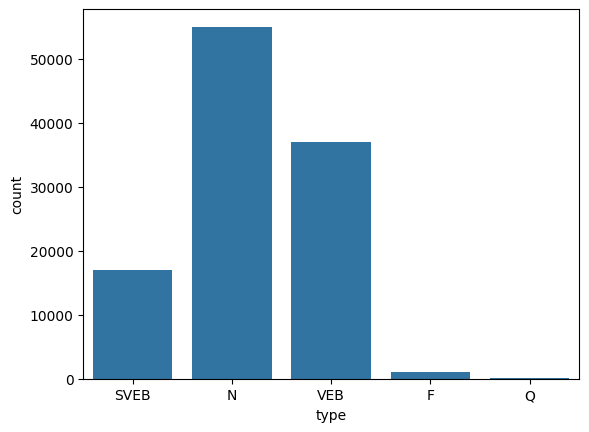

In [13]:
sns.countplot(data=dataset, x="type")

In [14]:
dataset = dataset[dataset["type"]!="Q"]

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["type_encoded"] = le.fit_transform(dataset["type"])

In [16]:
X = dataset[primary_features]
y = dataset["type_encoded"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Model training and quantization

In [21]:
!pip install tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but yo

In [21]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(11,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

quantize = tfmot.quantization.keras.quantize_model
q_aware_model = quantize(nn)

q_aware_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = q_aware_model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs = 15,
    validation_data = [X_test, y_test],
    callbacks=[early_stop]
)

Epoch 1/15
5468/5468 [==============================] - 39s 6ms/step - loss: 0.5695 - accuracy: 0.7917 - val_loss: 0.3984 - val_accuracy: 0.8678
Epoch 2/15
5468/5468 [==============================] - 34s 6ms/step - loss: 0.4259 - accuracy: 0.8515 - val_loss: 0.3598 - val_accuracy: 0.8836
Epoch 3/15
5468/5468 [==============================] - 37s 7ms/step - loss: 0.3927 - accuracy: 0.8635 - val_loss: 0.3478 - val_accuracy: 0.8864
Epoch 4/15
5468/5468 [==============================] - 33s 6ms/step - loss: 0.3764 - accuracy: 0.8699 - val_loss: 0.3311 - val_accuracy: 0.8974
Epoch 5/15
5468/5468 [==============================] - 32s 6ms/step - loss: 0.3659 - accuracy: 0.8749 - val_loss: 0.3470 - val_accuracy: 0.8878
Epoch 6/15
5468/5468 [==============================] - 34s 6ms/step - loss: 0.3609 - accuracy: 0.8765 - val_loss: 0.3290 - val_accuracy: 0.8938
Epoch 7/15
5468/5468 [==============================] - 33s 6ms/step - loss: 0.3547 - accuracy: 0.8787 - val_loss: 0.3233 - val_ac

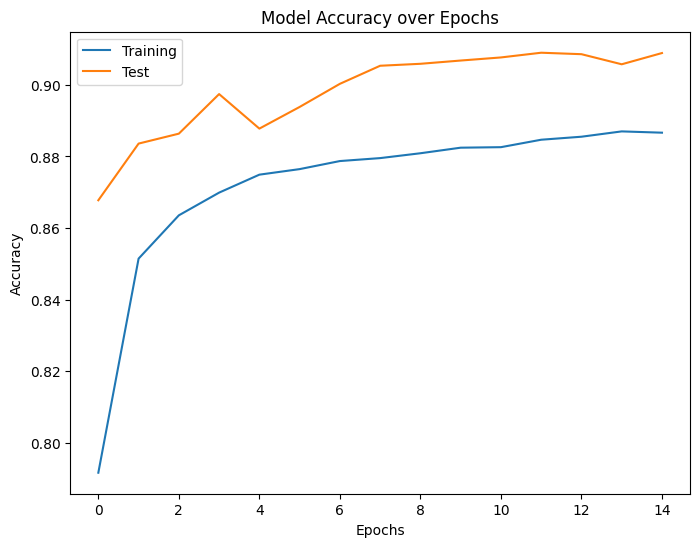

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label="Test")
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

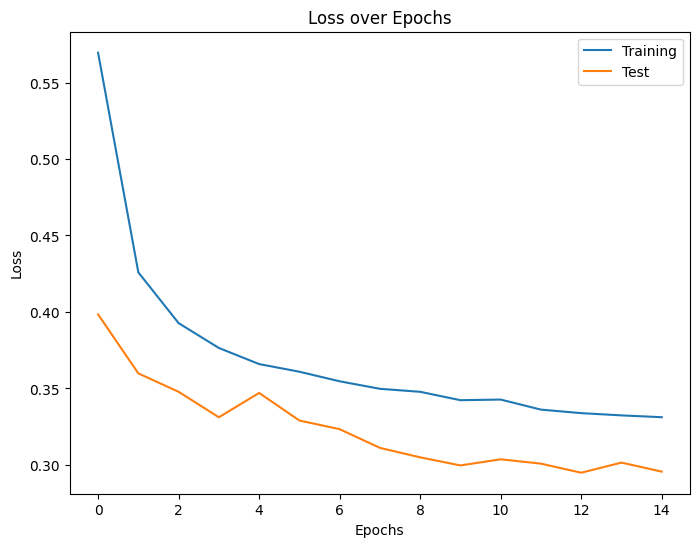

In [24]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Test")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
loss, acc = q_aware_model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc*100))

688/688 [==============================] - 3s 4ms/step - loss: 0.2949 - accuracy: 0.9085
Accuracy: 90.85%


688/688 [==============================] - 2s 3ms/step


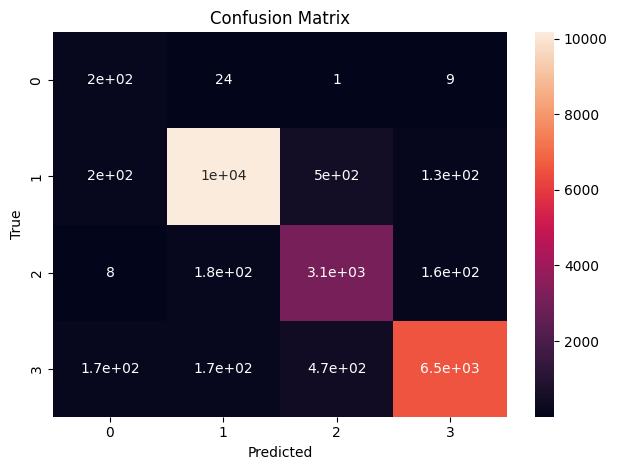

              precision    recall  f1-score   support

           F       0.35      0.85      0.49       232
           N       0.96      0.92      0.94     10991
        SVEB       0.76      0.90      0.82      3406
         VEB       0.96      0.89      0.92      7360

    accuracy                           0.91     21989
   macro avg       0.76      0.89      0.80     21989
weighted avg       0.92      0.91      0.91     21989



In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = q_aware_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

# Converting the model to Tensorflow Lite

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
tflite_model = converter.convert()
with open ("ecg-arrhythmia-model.tflite", "wb") as file:
  file.write(tflite_model)